# Antioch (37013) has the highest number of schools in MNPS, with a total of 40 schools. Do the MTA routes in Antioch match up with the locations of the schools in Antioch?

In [1]:
import fontawesome as fa

In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [3]:
zipcode = gpd.read_file('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Zip Codes (GIS).geojson')

In [4]:
mta = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Metro_Transit_Authority_Bus_Stops.csv')

In [5]:
zipcode.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."
1,37027,37,BRENTWOOD,3558.4949049555025,315672.26501464844,"(POLYGON ((-86.719974241412 36.009524281615, -..."
2,37143,29,PEGRAM,7053.537934957626,1901096.087890625,"(POLYGON ((-87.03537311557 36.087623620297, -8..."
3,37143,28,PEGRAM,1197.1070870572601,83126.842468261719,"(POLYGON ((-87.03605109734001 36.095325458066,..."
4,37240,44,NASHVILLE,9240.7969963306841,3146698.6988525391,"(POLYGON ((-86.803254434485 36.149298486807, -..."


In [6]:
mta.head()

,Stop ID Number,Stop Abbreviation,StopName,Shelter,Bench,Route Number,Route Name,Longitude,Latitude,Mapped Location
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,"(36.106851, -86.762639)"
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,"(36.108232, -86.765569)"
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,"(36.116603, -86.766280)"
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,"(36.121603, -86.765494)"
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,"(36.124624, -86.765827)"


In [7]:
mta.columns = ['stop_id', 'stop_abbrev','stop_name','shelter','bench','route_no','route_name',"lng",'lat','coordinates']

In [8]:
mta.head()

,stop_id,stop_abbrev,stop_name,shelter,bench,route_no,route_name,lng,lat,coordinates
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,"(36.106851, -86.762639)"
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,"(36.108232, -86.765569)"
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,"(36.116603, -86.766280)"
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,"(36.121603, -86.765494)"
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,"(36.124624, -86.765827)"


In [9]:
mta['geometry'] = mta.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [10]:
mta.head()

,stop_id,stop_abbrev,stop_name,shelter,bench,route_no,route_name,lng,lat,coordinates,geometry
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,"(36.106851, -86.762639)",POINT (-86.76263900000001 36.106851)
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,"(36.108232, -86.765569)",POINT (-86.765569 36.108232)
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,"(36.116603, -86.766280)",POINT (-86.76628000000001 36.116603)
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,"(36.121603, -86.765494)",POINT (-86.76549399999999 36.121603)
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,"(36.124624, -86.765827)",POINT (-86.765827 36.124624)


In [11]:
mta_geo = gpd.GeoDataFrame(mta, crs = zipcode.crs, geometry = mta['geometry'])

In [12]:
mta_zip = gpd.sjoin(mta_geo, zipcode, op = 'within')

In [13]:
schools = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Metro_Nashville_Public_School_Locations.csv')

In [14]:
schools.columns = ['SID','name','address','city','state','zip','phone','SSID','type','lowest_grade','highest_grade','lat','lng','website',"cluster","coordinates"]

In [15]:
schools['geometry'] = schools.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [16]:
schools_geo = gpd.GeoDataFrame(schools, crs = zipcode.crs, geometry = schools['geometry'])

In [17]:
schools_geo[['zip', 'name']].groupby('zip').agg('count').sort_values(by ='name', ascending = False)

,name
zip,
37013,40
37207,32
37211,30
37209,30
37206,24
37214,18
37210,18
37216,16
37208,16


In [18]:
schools37013 = schools_geo.loc[schools_geo['zip'] == 37013]

In [19]:
mta37013 = mta_zip.loc[mta_zip['zip'] == '37013']

In [20]:
mta37013.head()

,stop_id,stop_abbrev,stop_name,shelter,bench,route_no,route_name,lng,lat,coordinates,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
1064,420,BELMORSN,BELL RD & MORRIS GENTRY BLVD SB,0,0,15,MURFREESBORO ROAD,-86.636764,36.066713,"(36.066713, -86.636764)",POINT (-86.636764 36.066713),42,37013,41,ANTIOCH,345351.56322143978,1154549440.203186
1065,421,BELMORSM,BELL RD & MORRIS GENTRY BLVD SB,0,1,15,MURFREESBORO ROAD,-86.637206,36.064767,"(36.064767, -86.637206)",POINT (-86.63720600000001 36.064767),42,37013,41,ANTIOCH,345351.56322143978,1154549440.203186
1066,432,BELBELSF,BELL RD & BELL CREST DR SB,0,1,15,MURFREESBORO ROAD,-86.637948,36.062500,"(36.062500, -86.637948)",POINT (-86.63794799999999 36.0625),42,37013,41,ANTIOCH,345351.56322143978,1154549440.203186
1067,413,BELHHIWF,BELL RD & HICKORY HIGHLANDS DR WB,0,0,15,MURFREESBORO ROAD,-86.640854,36.059958,"(36.059958, -86.640854)",POINT (-86.640854 36.059958),42,37013,41,ANTIOCH,345351.56322143978,1154549440.203186
1068,414,BELHICWN,BELL RD & HICKORY HOLLOW TER. WB,0,0,15,MURFREESBORO ROAD,-86.646236,36.051240,"(36.051240, -86.646236)",POINT (-86.646236 36.05124),42,37013,41,ANTIOCH,345351.56322143978,1154549440.203186


In [21]:
zip_poly = zipcode.loc[zipcode.zip == '37013']

In [22]:
zip_poly.geometry.centroid

42    POINT (-86.63636274154366 36.04173095575453)
dtype: object

In [23]:
center37013 = [36.04173095575453, -86.63636274154366]

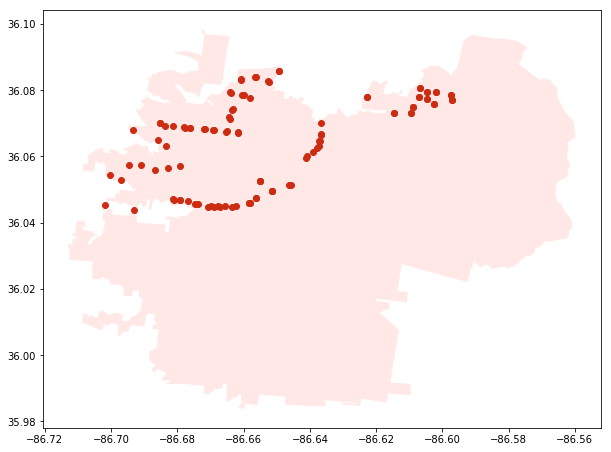

In [24]:
ax = zip_poly.plot(figsize = (10, 10), color = '#FFE8E5')
mta37013.plot( ax = ax, legend = True, color = '#CC2C12');

In [25]:
schools = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/Metro_Nashville_Public_School_Locations.csv')

In [26]:
schools.columns = ['SID','name','address','city','state','zip','phone','SSID','type','lowest_grade','highest_grade','lat','lng','website',"cluster","coordinates"]

In [27]:
schools.zip.value_counts(dropna = False)

37013    40
37207    32
37211    30
37209    30
37206    24
37214    18
37210    18
37216    16
37208    16
37115    16
37203    12
37217    12
37076    10
37218     8
37205     8
37072     6
37138     6
37220     6
37204     6
37215     6
37189     4
37221     4
37080     4
37212     4
37027     2
37228     2
Name: zip, dtype: int64

In [28]:
schools['geometry'] = schools.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [29]:
schools_geo = gpd.GeoDataFrame(schools, crs = zipcode.crs, geometry = schools['geometry'])

In [30]:
schools37013 = schools_geo.loc[schools_geo['zip'] == 37013]

In [31]:
schools37013.head()

,SID,name,address,city,state,zip,phone,SSID,type,lowest_grade,highest_grade,lat,lng,website,cluster,coordinates,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59941833000001 36.04667464)
5,111,Antioch Middle,5050 Blue Hole Road,Antioch,TN,37013,(615)333-5642,23,Middle School,Grade 5,Grade 8,36.055379,-86.671830,http://schools.mnps.org/antioch-middle-prep,Cane Ridge,"(36.05537897, -86.67182989)",POINT (-86.67182989 36.05537897)
6,577,Apollo Middle,631 Richards Rd,Antioch,TN,37013,(615)333-5025,25,Middle School,Grade 5,Grade 8,36.066878,-86.664070,http://schools.mnps.org/apollo-middle-prep,Antioch,"(36.06687798, -86.66406971)",POINT (-86.66406971000001 36.06687798)
12,419,Cambridge Early Learning Center,2325 Hickory Highlands Dr,Antioch,TN,37013,(615)687-4560,7005,Elementary School,Grade P4,Grade P4,36.060350,-86.641017,http://schools.mnps.org/cambridge-early-learni...,NaN,"(36.06035009, -86.64101743)",POINT (-86.64101743000001 36.06035009)


In [71]:
map_37013 = folium.Map(location = center37013, zoom_start = 12)
folium.GeoJson(zip_poly).add_to(map_37013)

for row in mta37013.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['stop_name']))
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color='green',icon='bus', prefix='fa'))
    
    marker.add_to(map_37013)

for row in schools37013.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['name'] + ', ' + str(row_values['type'])))
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color='red',icon='bell', icon_color='white', prefix='fa'))
    
    marker.add_to(map_37013)
    

map_37013

## There are bus stops within immediate walking distance of:
- Intrepid College Prep
- Cambridge Early Learning Center
- Apollo Middle School
- J.E. Moss Elementary

## There are bus stops within moderate walking distance of:
- Cole Elementary
- Knowledge Academy
- Smith Spring Elementary School
- The Academy at Hickory Hollow

# Only 20% of MNPS schools in Antioch are accessible by MTA.

extension:

# Why does this matter? Let's look at TVAAS data for MNPS.

### The Tennessee Value-Added Assessment System (TVAAS) measures student growth year over year, regardless of whether the student is proficient on the state assessment. In calculating a TVAAS score, a student’s performance is compared relative to the performance of his or her peers who have performed similarly on past assessments.

source: https://www.tn.gov/education/data/tvaas.html

In [33]:
tvaas = pd.read_csv('/Users/rabram/Desktop/NSS/Nashville-Public-Art/data/data_2018_TVAAS_School_Composite.csv')

In [34]:
tvaas.head()

,District Number,School Number,District Name,School Name,Overall Composite,Literacy Composite,Numeracy Composite,Literacy and Numeracy Composite,Science Composite,Social Studies Composite
0,10,2,Anderson County,Anderson County High School,5,1.0,5.0,3,5.0,1.0
1,10,5,Anderson County,Andersonville Elementary,5,4.0,5.0,5,5.0,4.0
2,10,10,Anderson County,Briceville Elementary,5,4.0,4.0,4,5.0,3.0
3,10,15,Anderson County,Claxton Elementary,5,3.0,5.0,5,5.0,1.0
4,10,20,Anderson County,Clinton Middle School,1,1.0,3.0,1,1.0,1.0


In [35]:
tvaas.columns = ['district_no','school_no','district','school','overall','lit','numeracy','lit_and_numeracy','science','ss']

In [36]:
tvaas_nashville = tvaas.loc[tvaas.district == "Davidson County"]

In [37]:
tvaas_nashville.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 234 to 387
Data columns (total 10 columns):
district_no         154 non-null int64
school_no           154 non-null int64
district            154 non-null object
school              154 non-null object
overall             154 non-null int64
lit                 153 non-null float64
numeracy            154 non-null float64
lit_and_numeracy    154 non-null int64
science             76 non-null float64
ss                  75 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 13.2+ KB


In [38]:
tvaas_zip = pd.merge(tvaas_nashville, schools_geo, left_on = "school",right_on = "name")

In [39]:
tvaas_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 27 columns):
district_no         280 non-null int64
school_no           280 non-null int64
district            280 non-null object
school              280 non-null object
overall             280 non-null int64
lit                 278 non-null float64
numeracy            280 non-null float64
lit_and_numeracy    280 non-null int64
science             134 non-null float64
ss                  132 non-null float64
SID                 280 non-null int64
name                280 non-null object
address             280 non-null object
city                280 non-null object
state               280 non-null object
zip                 280 non-null int64
phone               280 non-null object
SSID                280 non-null int64
type                280 non-null object
lowest_grade        280 non-null object
highest_grade       280 non-null object
lat                 280 non-null float64
lng              

In [40]:
del tvaas_zip['SSID']
del tvaas_zip['type']
del tvaas_zip['lowest_grade']
del tvaas_zip['highest_grade']

In [41]:
del tvaas_zip['phone']
del tvaas_zip['website']
del tvaas_zip['science']
del tvaas_zip['ss']

In [42]:
tvaas_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 19 columns):
district_no         280 non-null int64
school_no           280 non-null int64
district            280 non-null object
school              280 non-null object
overall             280 non-null int64
lit                 278 non-null float64
numeracy            280 non-null float64
lit_and_numeracy    280 non-null int64
SID                 280 non-null int64
name                280 non-null object
address             280 non-null object
city                280 non-null object
state               280 non-null object
zip                 280 non-null int64
lat                 280 non-null float64
lng                 280 non-null float64
cluster             190 non-null object
coordinates         280 non-null object
geometry            280 non-null object
dtypes: float64(4), int64(6), object(9)
memory usage: 43.8+ KB


In [43]:
tvaas_zip.head()

,district_no,school_no,district,school,overall,lit,numeracy,lit_and_numeracy,SID,name,address,city,state,zip,lat,lng,cluster,coordinates,geometry
0,190,1,Davidson County,A. Z. Kelley Elementary,1,1.0,1.0,1,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,36.021817,-86.658848,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
1,190,1,Davidson County,A. Z. Kelley Elementary,1,1.0,1.0,1,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,36.021817,-86.658848,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
2,190,5,Davidson County,Alex Green Elementary,3,3.0,3.0,3,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,36.252961,-86.832229,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
3,190,5,Davidson County,Alex Green Elementary,3,3.0,3.0,3,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,36.252961,-86.832229,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
4,190,10,Davidson County,Amqui Elementary,3,3.0,2.0,3,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,36.273766,-86.703832,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383153 36.27376585)


In [44]:
del tvaas_zip['SID']
del tvaas_zip['name']
del tvaas_zip['address']
del tvaas_zip['city']
del tvaas_zip['state']

In [45]:
tvaas_zip.head()

,district_no,school_no,district,school,overall,lit,numeracy,lit_and_numeracy,zip,lat,lng,cluster,coordinates,geometry
0,190,1,Davidson County,A. Z. Kelley Elementary,1,1.0,1.0,1,37013,36.021817,-86.658848,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
1,190,1,Davidson County,A. Z. Kelley Elementary,1,1.0,1.0,1,37013,36.021817,-86.658848,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65884778 36.02181712)
2,190,5,Davidson County,Alex Green Elementary,3,3.0,3.0,3,37189,36.252961,-86.832229,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
3,190,5,Davidson County,Alex Green Elementary,3,3.0,3.0,3,37189,36.252961,-86.832229,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.8322292 36.2529607)
4,190,10,Davidson County,Amqui Elementary,3,3.0,2.0,3,37115,36.273766,-86.703832,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383153 36.27376585)


In [46]:
tvaas_zip = tvaas_zip.drop_duplicates(subset='school')

In [47]:
tvaas_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 278
Data columns (total 14 columns):
district_no         140 non-null int64
school_no           140 non-null int64
district            140 non-null object
school              140 non-null object
overall             140 non-null int64
lit                 139 non-null float64
numeracy            140 non-null float64
lit_and_numeracy    140 non-null int64
zip                 140 non-null int64
lat                 140 non-null float64
lng                 140 non-null float64
cluster             95 non-null object
coordinates         140 non-null object
geometry            140 non-null object
dtypes: float64(4), int64(5), object(5)
memory usage: 16.4+ KB


In [48]:
tvaas_zip.describe()

,district_no,school_no,overall,lit,numeracy,lit_and_numeracy,zip,lat,lng
count,140.0,140.000000,140.00000,139.000000,140.000000,140.000000,140.00000,140.000000,140.000000
mean,190.0,1690.992857,2.80000,3.172662,2.585714,2.871429,37176.05000,36.152830,-86.747206
std,0.0,2902.712020,1.66297,1.498444,1.502926,1.590633,67.87635,0.070946,0.075500
min,190.0,1.000000,1.00000,1.000000,1.000000,1.000000,37013.00000,36.020174,-86.958050
25%,190.0,258.750000,1.00000,2.000000,1.000000,1.000000,37203.00000,36.095895,-86.798722
50%,190.0,447.500000,3.00000,3.000000,2.500000,3.000000,37208.00000,36.154653,-86.743416
75%,190.0,651.250000,5.00000,5.000000,4.000000,4.250000,37211.00000,36.196445,-86.707816
max,190.0,8100.000000,5.00000,5.000000,5.000000,5.000000,37228.00000,36.318151,-86.578658


## The  average TVAAS score for MNPS schools are: 
- Overall: 2.80
- Literacy: 3.17
- Math: 2.38
- Math & Reading: 2.87

In [49]:
tvaas37013 = tvaas_zip.loc[tvaas_zip['zip'] == 37013]

In [50]:
tvaas37013.overall.value_counts(dropna = False)

1    7
3    4
5    2
4    1
Name: overall, dtype: int64

In [51]:
tvaas37013_low = tvaas37013.nsmallest(7, 'overall')

In [52]:
tvaas37013_low.school

0              A. Z. Kelley Elementary
8                  Antioch High School
12                       Apollo Middle
24              Cane Ridge High School
56         Thomas A. Edison Elementary
200           Thurgood Marshall Middle
268    Knowledge Academies High School
Name: school, dtype: object

## In Antioch in 2017-2018,  7 schools have a 1 for their overall TVAAS score and are below the MNPS average. 5 of these 7 schools are inacessible to parents, families, and students by MTA.

### "Building strong parent-school relationships is another way to increase school and student outcomes."

"One study defined parent-school relationships by the degree to which parents trust staff, have
positive interactions with staff, and feel welcome at the school. This study used data from the National
Household Education Surveys Program of 2007: Parent and Family Involvement in Education Survey,
which collected data from across the United States. This study restricted data use to students in sixth
through twelfth grades. Data for parent-school relationships and student outcomes were gathered
through parent interviews. Results from SEM revealed that all three aspects of this parent-school
relationship were positively associated with student outcomes (i.e., estimates of students’ grades,
report of students’ problem behaviors at school, report of whether students had to repeat a grade)
(Froiland & Davison, 2014)." Source: https://www.nmefoundation.org/getattachment/67f7c030-df45-4076-a23f-0d7f0596983f/Final-Report-Family-Engagement-AIR.pdf?lang=en-US&ext=.pdf

## In Antioch, 5 of the lowest performing schools are inaccessible by MTA. 

## In Antioch, nearly 40% of families have an average household income of less than $25,000.

source: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi
### Families with low household incomes tend to rely on MTA for transportation, suggesting that up to 40% of Antioch families rely on MTA. If these families are unable to physically get to their student's school, it becomes significantly more difficult to build strong parent-school relationships. They cannot have the positive interactions necessary to build trust and feel welcome at the school if they are never physcially in the building. 

## These inaccesible schools in Antioch (AZ Kelley, Antioch HS, Cane Ridge, Thomas Edison, and Thurgood Marshall) are unable to see an increase in overall in TVAAS scores due to family engagement.

In [64]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as well.
 |  angle : int, default 0
 |      The icon will be rotated by this amount of degrees.
 